In [260]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl
import numpy as np
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

## Download data
Historical returns from about 200 stocks from Nasdaq, chosen randomly

In [2]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,12,1)

In [3]:
# download symbols of all nasdaq components
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
symbols = companies['Symbol'].tolist()

In [4]:
# randomly select 500 assets
random.seed(123)
Symbols = random.sample(symbols, 500)

In [16]:
# download stock prices
stock_final = pd.DataFrame()

for i in Symbols:  
    try:
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        if len(stock) == 0:
            None
        else:
            stock['Name']= i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None


1 Failed download:
- ASEI: No data found for this date range, symbol may be delisted

1 Failed download:
- MCRL: No data found for this date range, symbol may be delisted

1 Failed download:
- FUEL: No data found for this date range, symbol may be delisted

1 Failed download:
- LDRH: No data found for this date range, symbol may be delisted

1 Failed download:
- INNL: No data found for this date range, symbol may be delisted

1 Failed download:
- ASBI: No data found for this date range, symbol may be delisted

1 Failed download:
- IMNP: No data found, symbol may be delisted

1 Failed download:
- IILG: No data found for this date range, symbol may be delisted

1 Failed download:
- BOBE: No data found for this date range, symbol may be delisted

1 Failed download:
- LBRKR: No data found, symbol may be delisted

1 Failed download:
- BBEPP: No data found, symbol may be delisted

1 Failed download:
- HPJ: No data found, symbol may be delisted

1 Failed download:
- CADT: No data found for t


1 Failed download:
- DAEG: No data found for this date range, symbol may be delisted

1 Failed download:
- MFLX: No data found for this date range, symbol may be delisted

1 Failed download:
- VLCCF: No data found for this date range, symbol may be delisted

1 Failed download:
- USMD: No data found for this date range, symbol may be delisted

1 Failed download:
- LEVYU: No data found, symbol may be delisted

1 Failed download:
- ASBB: No data found for this date range, symbol may be delisted

1 Failed download:
- LMOS: No data found for this date range, symbol may be delisted

1 Failed download:
- NYNY: No data found, symbol may be delisted

1 Failed download:
- IBCA: No data found for this date range, symbol may be delisted

1 Failed download:
- FES: No data found for this date range, symbol may be delisted

1 Failed download:
- SBSA: No data found for this date range, symbol may be delisted

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted

1 Faile

In [30]:
# dataframe of closing prices 
close = stock_final[["Close", "Name"]]
close_wide = close.pivot_table(index="Date", columns='Name', values='Close')
stock_price = close_wide.dropna(axis = 1)

In [31]:
n_stocks = len(stock_price.columns)

In [32]:
# stock returns
returns = stock_price.pct_change().iloc[1:]
returns.head()

In [278]:
returns.to_pickle('http://localhost:8888/tree/Desktop/returns.pkl')

returns_open = pd.read_pickle('returns.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'returns.pkl'

In [184]:
# summary statistics
# returns.describe()

In [277]:
returns

Name,AAL,ACAD,ACGL,ACTG,ACUR,ADMP,AEGN,AGNC,AINV,ALOT,...,UNB,URBN,VCIT,VOD,WHLM,WSBC,WSBF,WSTG,XOMA,ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.014463,0.030303,0.005591,0.070253,0.026266,0.000000,0.025088,0.006405,0.039832,-0.045576,...,0.029499,-0.002286,0.003605,0.004331,0.000000,0.032415,0.151220,0.000000,0.000000,-0.028302
2010-01-05,0.113208,-0.014706,-0.003336,-0.029744,-0.032907,-0.031250,-0.018892,-0.003369,0.056452,0.004214,...,0.000000,0.018619,0.006652,-0.007331,0.111111,-0.032967,0.016949,0.001258,-0.014286,-0.005663
2010-01-06,-0.041431,-0.007463,-0.004323,-0.012685,-0.001890,0.064516,-0.003501,-0.012021,0.016221,-0.005594,...,0.000000,-0.007874,-0.002115,-0.007819,0.000000,-0.017857,-0.070833,-0.012563,0.014493,0.031733
2010-01-07,0.029469,0.030075,-0.005882,0.031049,-0.005682,0.000000,0.006588,-0.004943,0.008451,0.018284,...,-0.025788,-0.034014,0.003179,-0.018827,0.000000,0.056198,0.067265,0.011450,-0.014286,0.156151
2010-01-08,-0.019084,0.051095,-0.001972,-0.012461,0.003810,0.060606,-0.010035,0.012610,0.015829,0.000000,...,0.000000,-0.002054,0.001056,-0.015172,0.000000,0.028951,0.042017,0.006289,0.014493,0.004775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,0.082203,0.005040,0.000589,0.010811,0.000000,0.000000,0.046884,0.015779,0.026465,0.013238,...,0.012554,0.044195,-0.000207,-0.004857,0.058659,0.019130,0.004978,-0.038937,0.010710,0.039712
2020-11-24,0.092920,0.016345,0.016475,0.008021,0.037037,0.000000,0.043084,0.016181,0.024862,-0.004020,...,0.046106,-0.048642,0.000414,0.028676,-0.002639,0.049829,0.024216,0.007150,-0.016046,0.019375
2020-11-25,0.008097,0.020833,-0.028944,0.002653,-0.250000,0.048781,-0.017391,-0.003185,-0.003594,-0.009082,...,0.020370,-0.011952,0.001241,-0.005931,-0.007937,-0.020806,-0.013434,0.000947,0.004923,-0.001086


In [265]:
# training and test set 
cutoff = "2019-12-31"
ret_train = returns[returns.index <= cutoff]

## K-Means

The k-means algorithm divides a set of $N$ samples $X$ into $C$ disjoint clusters, each described by the mean $\mu_i$ 
of the samples in the cluster (the centroid). The K-means algorithm aims to choose centroids that minimise the within-cluster sum-of-squares:
$$
\sum_{i=0}^{n} \underset{\mu_i \in C}{min} (| x_i - \mu_i |)^2
$$

In [268]:
# annual mean returns and variances 
mean_ret = ret_train.mean() * 252
var_ret = ret_train.std() * sqrt(252)
rets_df = pd.concat([mean_ret, var_ret], axis = 1)
rets_df.columns = ["Returns","Variance"]

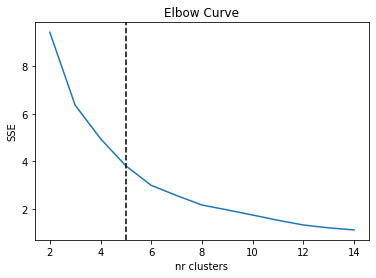

In [269]:
# select optimal number of clusters by minimizing SSE
X =  rets_df.values 
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each cluster
    
pl.plot(range(2,15), sse)
pl.title("Elbow Curve")
pl.xlabel('nr clusters')
pl.ylabel('SSE')
pl.axvline(x=5, c = "k", linestyle='dashed')
pl.show()

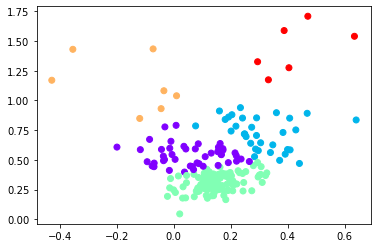

In [270]:
# fit k-means with 5 clusters
X = rets_df.values 
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap = "rainbow")
pl.show()

In [271]:
# remove outlier (rerun previous chunk afterwards)
outlier = mean_ret.idxmax()

rets_df.drop(outlier, inplace = True)
returns.drop(outlier, 1, inplace = True)

C:\Users\uga05338\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [164]:
# count number of elements in each cluster
cluster_idx = np.array(kmeans.labels_)
(unique, counts) = np.unique(idx, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 114]
 [  1  32]
 [  2   4]
 [  3   9]
 [  4  39]]


In [175]:
# get cluster number for each asset
asset = pd.DataFrame(rets_df.index)
cluster_list = pd.concat([asset, pd.DataFrame(cluster_idx)],axis = 1)
cluster_list.columns = ["Asset","Cluster"]

## Portfolio optimization

In [273]:
# test set for rolling optimization
ret_test = returns[returns.index > (datetime.strptime(cutoff, '%Y-%m-%d') -  relativedelta(years=1))]

In [274]:
# save returns series for each cluster in dictionary
ret_dict = {}
for i in unique: 
    lgc = cluster_list["Cluster"] == i
    ret_dict[i] = returns.loc[:,lgc.values]

In [275]:
print(ret_dict)

{0: Name             AAL      ACGL      AEGN      AGNC      AINV      ALOT  \
Date                                                                     
2010-01-04 -0.014463  0.005591  0.025088  0.006405  0.039832 -0.045576   
2010-01-05  0.113208 -0.003336 -0.018892 -0.003369  0.056452  0.004214   
2010-01-06 -0.041431 -0.004323 -0.003501 -0.012021  0.016221 -0.005594   
2010-01-07  0.029469 -0.005882  0.006588 -0.004943  0.008451  0.018284   
2010-01-08 -0.019084 -0.001972 -0.010035  0.012610  0.015829  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-11-23  0.082203  0.000589  0.046884  0.015779  0.026465  0.013238   
2020-11-24  0.092920  0.016475  0.043084  0.016181  0.024862 -0.004020   
2020-11-25  0.008097 -0.028944 -0.017391 -0.003185 -0.003594 -0.009082   
2020-11-27  0.002677 -0.015499 -0.019358 -0.005112  0.001803  0.018330   
2020-11-30 -0.056742 -0.025129 -0.032713 -0.018626 -0.023402  0.003000   

Name            AMSF     AMSWA   

In [ ]:
# compute equally weighted monthly portfolio returns from 2020-01-01 to 2020-12-01 for each cluster